<a href="https://colab.research.google.com/github/piyush02nir/Netflix-Movies-and-TV-Show-Clustering-Unsupervised-/blob/main/Netflix_Movies_and_TV_Show_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Netflix Movies and TV Show Clustering(Unsupervised)

##### **Contribution**    - Piyush Nirwan

# **Project Summary -**

Netflix, the world’s largest on-demand internet streaming media and online DVD movie rental service provider.it Founded August 29, 1997, in Los Gatos, California by Marc and Reed. It has 69 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day Netflix is the world’s leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive, and exciting visualizations and find similar groups of people.

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
import missingno as msno 

from warnings import filterwarnings
filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mount Drive to load data
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the data.
netflix_df = pd.read_csv('/content/drive/MyDrive/Netflix Movies and TV Show Clustering/Data_Source/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
netflix_df.head()

In [ ]:
netflix_df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
netflix_df.shape

### Dataset Information

In [ ]:
# Dataset Info
netflix_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
netflix_df.duplicated().sum()

In [ ]:
# Visualizing the missing values
msno.bar(netflix_df, color="Teal")

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(netflix_df.isnull().sum())

In [ ]:
# Visualizing the missing values

# Checking Null Value by plotting Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(netflix_df.isnull(), cbar=False)
plt.show()

In [ ]:
# Choosing the primary country and primary genre to simplify the analysis
netflix_df['country'] = netflix_df['country'].astype('str')
netflix_df['country'] = netflix_df['country'].apply(lambda x: x.split(',')[0])
netflix_df['listed_in'] = netflix_df['listed_in'].apply(lambda x: x.split(',')[0])

In [ ]:
# contry in which a movie was produced
netflix_df.country.value_counts()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
netflix_df.columns

In [ ]:
# Dataset Describe
netflix_df.describe(include='all')

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in netflix_df.columns.tolist():
  print("No. of unique values in ",i,"is",netflix_df[i].nunique(),".")

In [ ]:
unique_values = netflix_df.nunique().sort_values()
# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(25, 10), title="Structure of numerical features")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Create new features to store date, day, month and year seperately.
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])  # First convert date_added to date time format.
netflix_df['day_added'] = netflix_df['date_added'].dt.day            # Compute day.
netflix_df['year_added'] = netflix_df['date_added'].dt.year          # Compute year.
netflix_df['month_added'] = netflix_df['date_added'].dt.month        # Compute month.

In [ ]:
# Create subsets for tv shows and movies.
tv_shows = netflix_df[netflix_df['type'] == 'TV Show']
movies = netflix_df[netflix_df['type'] == 'Movie']

# Select the durations for both.
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '') \
                                                       .str.replace(' Seasons', '') \
                                                       .str.replace('s', '')                                                       
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')                                                       
duration_movies.duration = duration_movies.duration.astype(str).astype(int)

### What all manipulations have you done and insights you found?

We made new features to store date, day, month and year seperately

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
colors = ['	#db0000', '	#564d4d']
labels = ['Tv Show', 'Movie']
tv_show = netflix_df.type.value_counts()[1]
movie = netflix_df.type.value_counts()[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=[tv_show, movie], hole=.6)])
fig.update_layout(
    title_text="Type of content watched on Netflix",title_x=0.5, legend=dict(x=0.9),height=500, width=500,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Type of content.', font_size=20, showarrow=False)])
fig.update_traces(marker=dict(colors=colors))

fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
netflix_df[~(netflix_df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='bar')
plt.title(' Top 10 countries with the highest number of shows')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(netflix_df['release_year'])
plt.title('distribution by released year')

In [ ]:
# Plot growth of the contents over the years.
tv_show = netflix_df[netflix_df["type"] == "TV Show"]
movie = netflix_df[netflix_df["type"] == "Movie"]

col = "year_added"

content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

trace1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color="#db0000"))
trace2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color="#564d4d"))

data = [trace1, trace2]
layout = go.Layout(title="Content added over the years",title_x=0.47, legend=dict(x=0.4, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)

fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
# Seprating Genres
genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

# ploting graph for top 10 genres
plt.figure(figsize=(7,9))
g = sns.countplot(y = genres, order=genres.value_counts().index[:10],palette = "Pastel1")
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating', hue='type', data=netflix_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
# Graph for top 10 directors
directors = netflix_df[netflix_df.director != 'Unknown'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='mako')
plt.title('Top 10 Director on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
# Graph for top 10 actors
actor = netflix_df[netflix_df.cast != 'Unknown'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = actor, order=actor.value_counts().index[:10], palette='mako')
plt.title('Top 10 Actors on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
#Plotting a countplot for getting better insights from monthwise addition
plt.figure(figsize=(9,7))
sns.countplot(x='month_added',hue='type',data=netflix_df)
plt.title("Monthwise content addition")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
#Plotting a countplot for getting better insights from datewise addition
plt.figure(figsize=(15,6))
sns.countplot(x='day_added',hue='type',data=netflix_df)
plt.xlabel('Days')
plt.ylabel('Total no. of Movies/TV shows added')
plt.title("Daywise content addition")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
 # Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=netflix_df[netflix_df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code


# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in netflix_df.description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in description', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_movies['duration'], color='#db0000')
plt.title('Duration of movies')
plt.show()

In [ ]:
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration'], color='#db0000')
plt.title('Duration of Tv Shows.')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
# iterate through the column.
for val in netflix_df.title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in title', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}
netflix_df2 = netflix_df.copy()
netflix_df2['rating'].replace(rating_map, inplace = True)
netflix_df2['rating'].unique()

In [ ]:
print(netflix_df2['country'])

In [ ]:
netflix_df2['country'] = netflix_df2['country'].astype('|S')

In [ ]:
netflix_df2['principal_country'] = netflix_df2['country'].apply(lambda x: x.decode().split(",")[0])
netflix_df2['principal_country'].head()

country_order = netflix_df2['principal_country'].value_counts()[:11].index
content_data = netflix_df2[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]
     

netflix_df2['count'] = 1
data = netflix_df2.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']

Flix_df_heatmap = netflix_df2.loc[netflix_df2['principal_country'].isin(data)]
Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['rating'],normalize = "index").T
Flix_df_heatmap

In [ ]:
# Chart - 14 visualization code

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 12))

# Define the countries and ages to be included in the plot
country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

# Plot the heatmap
sns.heatmap(Flix_df_heatmap.loc[age_order, country_order], cmap="PuBu", square=True, linewidth=2.5, cbar=False,
            annot=True, fmt='2.0%', vmax=.6, vmin=0.05, ax=ax, annot_kws={"fontsize": 15})

# Customize the plot
ax.spines['top'].set_visible(True)
fig.text(.76, .765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15, ha='right')   
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation=0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='both', which='both', length=0)

# Improve the layout
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.set_style("whitegrid", {'axes.grid' : False}) #set style of the plot

#plot the pair plot of all the required columns in the dataframe
pp=sns.pairplot(netflix_df.sample(1000))
pp.fig.set_size_inches(45,45)
     

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
netflix_df[['director','cast','country']] = netflix_df[['director','cast','country']].fillna('Unknown')
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])
netflix_df.dropna(axis=0, inplace = True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

## We will be using text columns to create clusters for our data.

In [ ]:
cluster_df = netflix_df[['title']]
cluster_df['cluster_data'] = (netflix_df['description'] + ' ' + netflix_df['listed_in'] + ' ' + netflix_df['director'] + ' ' + netflix_df['cast'] + ' ' + netflix_df['country'] + ' ' + netflix_df['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()

In [ ]:
# Remove punctuation from the text.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(2)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
# Remove the stopwords.
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head(2)    

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)  

In [ ]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(2)

In [ ]:
bag_of_words = cluster_df.cluster_data

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
cluster_df = netflix_df[['title']]
cluster_df['cluster_data'] = (netflix_df['description'] + ' ' + netflix_df['listed_in'] + ' ' + netflix_df['director'] + ' ' + netflix_df['cast'] + ' ' + netflix_df['country'] + ' ' + netflix_df['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()

In [ ]:
# Remove punctuation from the text.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(2)

In [ ]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

In [ ]:
stop_words = stopwords

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    if isinstance(text, str):
        text = [word.lower() for word in text.split() if word.lower() not in stop_words]
        return " ".join(text)
    else:
        return text

In [ ]:
# Remove the stopwords.
# def stopwords(text):
#     '''a function for removing the stopword'''
#     text = [word.lower() for word in text.split() if word.lower() not in stop_words]
#     return " ".join(text)

# cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
# cluster_df.cluster_data.head(2)

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 
     

In [ ]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(2)

In [ ]:
bag_of_words = cluster_df.cluster_data

## Create Clusters:

In [ ]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
print(X.shape)

In [ ]:
t_vectorizer.get_feature_names_out()

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# tsne = TSNE(random_state=40)
# X_embedded = tsne.fit_transform(X)

# plt.figure(figsize=(10, 5))
# plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
# plt.title('t-SNE visualization of the data')
# plt.xlabel('First dimension')
# plt.ylabel('Second dimension')
# plt.show()

In [ ]:
# from sklearn.manifold import TSNE

# # t-SNE
# tsne = TSNE(random_state=40)
# tsne_embeddings = tsne.fit_transform(X.toarray())


In [ ]:
# # using PCA to reduce dimensionality
pca = PCA(random_state=40)
pca.fit(X.toarray())
# # pca.fit(X)

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

In [ ]:
X_transformed

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 K-means

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()
     

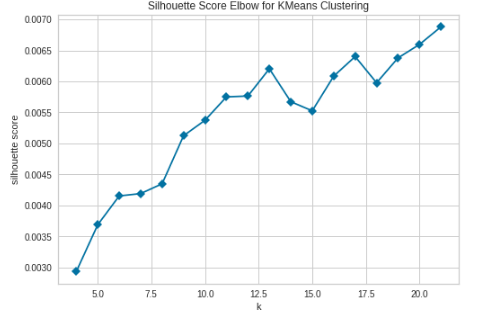

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
     

from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

In [ ]:
silhouette_score_analysis(22)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***